In [1]:
import numpy as np

In [2]:
!pip install opencv-python


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Thor.jpeg to Thor.jpeg


(np.float64(-0.5), np.float64(193.5), np.float64(147.5), np.float64(-0.5))

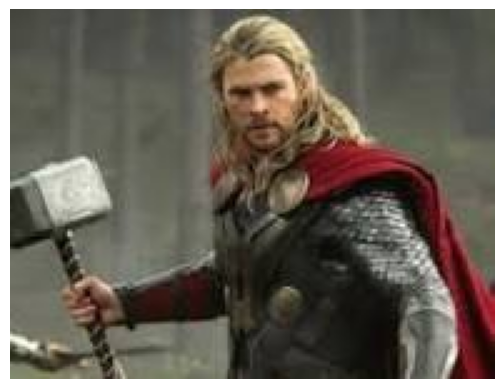

In [10]:
import cv2
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("Thor.jpeg")

# Convert BGR to RGB (important for Colab)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(img_rgb)
plt.axis("off")


Why convert BGR to RGB?
OpenCV reads in BGR
Matplotlib shows in RGB
If you don’t convert → colors look wrong.

(np.float64(-0.5), np.float64(193.5), np.float64(147.5), np.float64(-0.5))

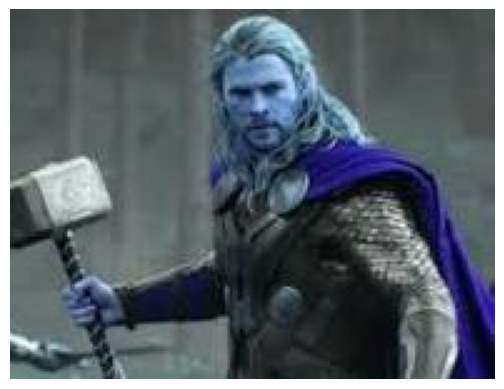

In [11]:

# Convert BGR to RGB (important for Colab)
# Show image
plt.imshow(img)
plt.axis("off")


Height = 148 pixels
Width = 190 pixels
Channels = 3 (BGR color)


In [12]:
print(img.shape)

(148, 194, 3)


(np.float64(-0.5), np.float64(193.5), np.float64(147.5), np.float64(-0.5))

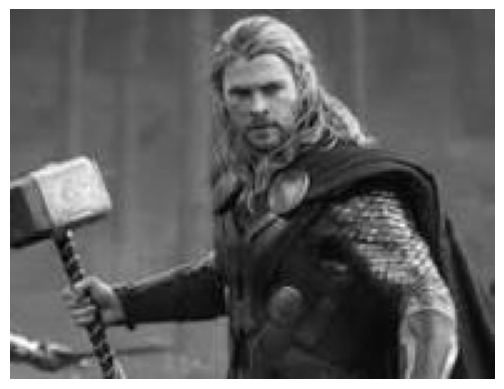

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis("off")


why? black and white? cause computers understand shape better in black n gray
Face detection
Edge detection
Text recognition
All work better on black & white

eg:
Medical X-ray
CCTV night vision
Fingerprints

(np.float64(-0.5), np.float64(119.5), np.float64(99.5), np.float64(-0.5))

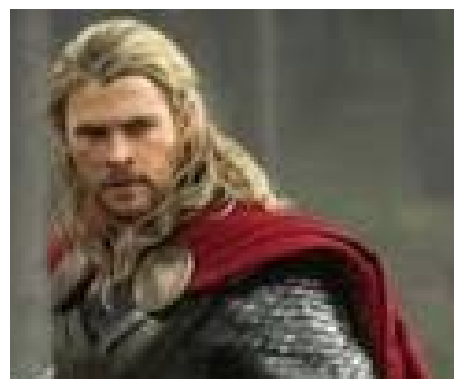

In [17]:
crop = img[0:100, 70:190] #img[ row_start : row_end , col_start : col_end ]  100-0=99 pixels 190-70=119

crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
plt.imshow(crop_rgb)
plt.axis("off")


In [18]:
img.shape

(148, 194, 3)

(np.float64(-0.5), np.float64(193.5), np.float64(147.5), np.float64(-0.5))

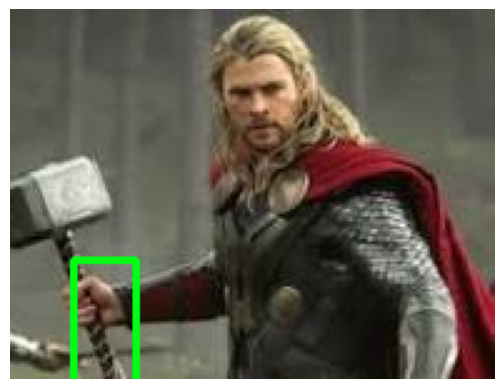

In [19]:
# Draw rectangle
cv2.rectangle(
    img,
    (25,100 ),   # top-left corner (x, y)
    (50, 180),   # bottom-right corner (x, y)
    (20, 255, 0),  # color (Green)
    2          # thickness
)

# Convert to RGB for Colab
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")


array([[[ 60,  68,  67],
        [ 60,  68,  67],
        [ 61,  69,  68],
        ...,
        [ 73,  84,  81],
        [ 71,  85,  81],
        [ 71,  85,  81]],

       [[ 61,  69,  68],
        [ 61,  69,  68],
        [ 61,  69,  68],
        ...,
        [ 73,  84,  81],
        [ 71,  85,  81],
        [ 71,  85,  81]],

       [[ 61,  69,  68],
        [ 61,  69,  68],
        [ 62,  70,  69],
        ...,
        [ 73,  84,  81],
        [ 71,  85,  81],
        [ 71,  85,  81]],

       ...,

       [[109, 136, 127],
        [109, 136, 127],
        [108, 134, 128],
        ...,
        [  7,   5,  47],
        [ 10,   5,  37],
        [ 11,   6,  33]],

       [[111, 138, 129],
        [110, 137, 128],
        [110, 136, 130],
        ...,
        [  9,   7,  49],
        [ 11,   6,  38],
        [ 11,   6,  35]],

       [[112, 139, 130],
        [112, 139, 130],
        [112, 138, 132],
        ...,
        [ 10,   8,  50],
        [ 11,   6,  38],
        [ 11,   6,  35]]], dtype=uint8)
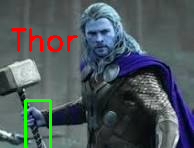

In [22]:
cv2.putText(
    img,
    "Thor",
    (10, 50),   # text position
    cv2.FONT_HERSHEY_SIMPLEX,
    1,          # font size
    (255, 0, 0),
    2
)


(np.float64(-0.5), np.float64(193.5), np.float64(147.5), np.float64(-0.5))

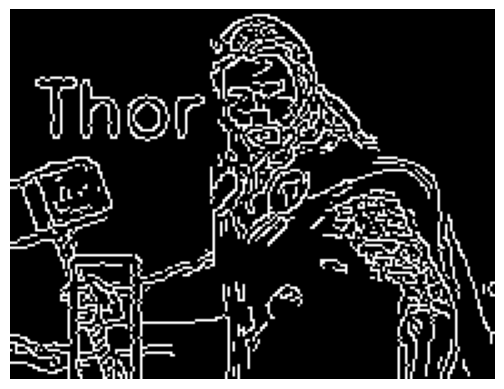

In [26]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 100, 150)

plt.imshow(edges, cmap='gray')
plt.axis("off")


Why 100 and 200?
These are sensitivity values
100 → weak edge limit
200 → strong edge limit

Smaller → more edges
Bigger → fewer edges

(np.float64(-0.5), np.float64(193.5), np.float64(147.5), np.float64(-0.5))

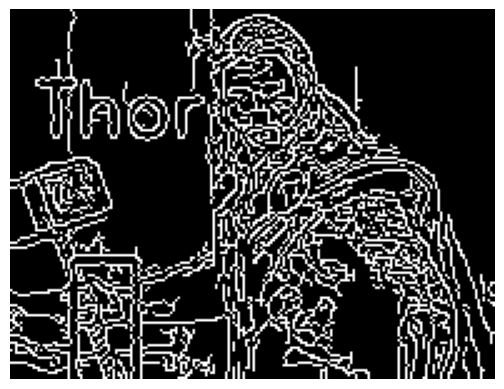

In [27]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 10, 100)

plt.imshow(edges, cmap='gray')
plt.axis("off")


Took edges

Connected them

Found closed shapes

Stored them as contours

Each contour = one object outline.

In [28]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("Total objects found:", len(contours))


Total objects found: 87
